# Toolbox

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, f_oneway, mannwhitneyu

In [2]:
# Load the datasets

titanic_df = pd.read_csv('./data/titanic.csv')
cities_df = pd.read_csv('./data/california_cities.csv')
inmo_df = pd.read_csv('./data/ejemplo_housing.csv')
flights_df = pd.read_csv('./data/dataset_viajes_jun23.csv')
customers_df = pd.read_csv('./data/Marketing-Customer-Analysis.csv')

### describe_df()

In [3]:
def describe_df(df): 
    """
    Generates a summary DataFrame describing the input DataFrame's data types, percentage of missing values, number of unique values and cardinality (percentage of unique values).
    
    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame to be described.
    
    Returns
    -------
    df_summary: pd.DataFrame
        A DataFrame with a summary of data types, missing values, unique values and cardinality for each column of the input DataFrame.
    
    Raises
    ------
    TypeError
        If the input is not a pandas DataFrame.
    
    ValueError
        If the DataFrame is empty.
    """

    # Validate input type
    if not isinstance(df, pd.DataFrame):
        raise TypeError(f'Input must be a pandas DataFrame, but received {type(df).__name__}.')
    
    # Calculate the length of the DataFrame once
    num_rows = len(df)
    
    # Validate DataFrame length to prevent dividing by 0 later on
    if num_rows == 0:
        raise ValueError('The DataFrame is empty.')
    
    # Calculate data types, missing values percentage, unique values and cardinality
    data_type = df.dtypes
    missings = round(df.isna().sum() / num_rows * 100, 2)
    unique_values = df.nunique()
    cardin = round(unique_values / num_rows * 100, 2)
    
    # Construct the summary DataFrame
    df_summary = pd.DataFrame({
        'DATA_TYPE': data_type,
        'MISSINGS (%)': missings,
        'UNIQUE_VALUES': unique_values,
        'CARDIN (%)': cardin
    }).T

    return df_summary


In [4]:
def describe_df_extra(df, count = False): 
    """
    Generates a summary DataFrame describing the input DataFrame's data types, percentage of missing values, number of unique values, cardinality (percentage of unique values), and optionally, the count of non-null values.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame to be described.
    
    count : bool, optional
        If True, includes the count of non-null values in each column (default is False).
    
    Returns
    -------
    df_summary: pd.DataFrame
        A DataFrame with a summary of data types, missing values, unique values, cardinality, and optionally, the count of non-null values for each column.
    
    Raises
    ------
    TypeError
        If the input is not a pandas DataFrame.
    
    ValueError
        If the DataFrame is empty.
    """

    # Validate input type
    if not isinstance(df, pd.DataFrame):
        raise TypeError(f'Input must be a pandas DataFrame, but received {type(df).__name__}.')
    
    # Calculate the length of the DataFrame once
    num_rows = len(df)
    
    # Validate DataFrame length to prevent dividing by 0 later on
    if num_rows == 0:
        raise ValueError('The DataFrame is empty.')
    
    # Calculate data types, missing values percentage, unique values and cardinality
    data_type = df.dtypes
    missings = round(df.isna().sum() / num_rows * 100, 2)
    unique_values = df.nunique()
    cardin = round(unique_values / num_rows * 100, 2)
    
    # Construct the summary DataFrame
    df_summary = pd.DataFrame({
        'DATA_TYPE': data_type,
        'MISSINGS (%)': missings,
        'UNIQUE_VALUES': unique_values,
        'CARDIN (%)': cardin
    })
    
    # Optionally add the count of non-null values and rearrange the columns
    if count:
        not_null_count = df.notna().sum()
        df_summary.insert(1, 'NOT-NULL COUNT', not_null_count)

    return df_summary.T


### tipifica_variable()

In [5]:
def tipifica_variables(df, umbral_categoria, umbral_continua):
    """
    Classifies the columns of a DataFrame based on their cardinality and percentage cardinality.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame whose columns will be classified.
    umbral_categoria : int
        The threshold for categorical variables. Columns with unique values less than or equal to this threshold will be classified as 'Categorica'.
    umbral_continua : float
        The threshold for continuous numerical variables, based on the percentage of unique values in the column. 
        If the percentage of unique values is greater than or equal to this threshold, the column is classified as 'Numerica Continua'.

    Returns
    -------
    df_type : pandas.DataFrame
        A DataFrame with columns 'nombre_variable' (variable names) and 'tipo_sugerido' (suggested type based on cardinality and percentage).
        It provides the column names and their suggested type classification based on cardinality thresholds.
    
    Raises
    ------
    TypeError
        If the input `df` is not a pandas DataFrame, or if `umbral_categoria` is not an integer, or `umbral_continua` is not a float.
    """
    
    # Validate input types
    if not isinstance(df, pd.DataFrame):
        raise TypeError(f'Parameter df must be a pandas DataFrame, but received {type(df).__name__}.')
    if not isinstance(umbral_categoria, (int, float)):
        raise TypeError(f'Parameter umbral_categoria must be int, but received {type(umbral_categoria).__name__}.')
    if not isinstance(umbral_continua, (int, float)):
        raise TypeError(f'Parameter umbral_continua must be float, but received {type(umbral_continua).__name__}.')
    
    # Change types if needed
    if isinstance(umbral_categoria, float):
        umbral_categoria = int(umbral_categoria)
    if isinstance(umbral_continua, int):
        umbral_categoria = float(umbral_categoria)
    
    # Get the number of rows in the DataFrame
    num_rows = len(df) 
    
    # Lists to store column names and their suggested types
    col_name = []
    suggested_type = []

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Calculate cardinality and percentage cardinality
        cardinality = df[col].nunique()
        percentage_cardinality = cardinality / num_rows * 100
        
        # Classify the variable based on cardinality and percentage cardinality
        if cardinality == 2:
            type_classification = 'Binaria'
        elif cardinality < umbral_categoria:
            type_classification = 'Categorica'
        else:
            type_classification = 'Numerica Continua' if percentage_cardinality >= umbral_continua else 'Numerica Discreta'
        
        # Add the column name and its classification to the respective lists
        col_name.append(col)
        suggested_type.append(type_classification)
    
    # Create a DataFrame with the column names and their suggested types
    df_type = pd.DataFrame({'nombre_variable': col_name, 'tipo_sugerido': suggested_type})
        
    # Return the final DataFrame with classifications
    return df_type


In [6]:
def tipifica_variables_extra(df, umbral_categoria, umbral_continua, *, show_cardinality=False, show_percentage=False):
    """
    Classifies the columns of a DataFrame based on their cardinality and percentage cardinality.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame whose columns will be classified.
    umbral_categoria : int
        The threshold for categorical variables. Columns with unique values less than or equal to this threshold will be classified as 'Categorica'.
    umbral_continua : float
        The threshold for continuous numerical variables, based on the percentage of unique values in the column. 
        If the percentage of unique values is greater than or equal to this threshold, the column is classified as 'Numerica Continua'.
    show_cardinality : bool, optional (default=False)
        If True, includes the cardinality (number of unique values) of each column in the output DataFrame.
    show_percentage : bool, optional (default=False)
        If True, includes the percentage of unique values (cardinality relative to the total number of rows) of each column in the output DataFrame.

    Returns
    -------
    df_type : pandas.DataFrame
        A DataFrame with columns 'nombre_variable', 'tipo_sugerido', and optionally 'cardinalidad' and '%_cardinalidad'based on the input flags (show_cardinality and show_percentage).
        The DataFrame provides the column names and their suggested type classification.
    
    Raises
    ------
    TypeError
        If the input `df` is not a pandas DataFrame, or if `umbral_categoria` is not an integer, or `umbral_continua` is not a float.
    """
    
    # Validate input types
    if not isinstance(df, pd.DataFrame):
        raise TypeError(f'Parameter df must be a pandas DataFrame, but received {type(df).__name__}.')
    if not isinstance(umbral_categoria, (int, float)):
        raise TypeError(f'Parameter umbral_categoria must be int, but received {type(umbral_categoria).__name__}.')
    if not isinstance(umbral_continua, (int, float)):
        raise TypeError(f'Parameter umbral_continua must be float, but received {type(umbral_continua).__name__}.')
    
    # Change types if needed
    if isinstance(umbral_categoria, float):
        umbral_categoria = int(umbral_categoria)
    if isinstance(umbral_continua, int):
        umbral_categoria = float(umbral_categoria)

    # Get the number of rows in the DataFrame
    num_rows = len(df) 
    
    # Lists to store column names and their suggested type
    col_name = []
    suggested_type = []
    
    # Lists to store cardinality and percentage, if required
    if show_cardinality:
        cardinality_list = []
    if show_percentage:
        percentage_list = []

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Calculate cardinality and percentage cardinality
        cardinality = df[col].nunique()
        percentage_cardinality = cardinality / num_rows * 100
        
        # Classify the variable based on cardinality and percentage cardinality
        if cardinality == 2:
            type_classification = 'Binaria'
        elif cardinality < umbral_categoria:
            type_classification = 'Categorica'
        else:
            type_classification = 'Numerica Continua' if percentage_cardinality >= umbral_continua else 'Numerica Discreta'
        
        # Add column name and its classification to their respective lists
        col_name.append(col)
        suggested_type.append(type_classification)
        
        # If show_cardinality is True, store the cardinality value
        if show_cardinality:
            cardinality_list.append(cardinality)
        # If show_percentage is True, store the percentage cardinality, rounded to 2 decimal places
        if show_percentage:
            percentage_list.append(round(percentage_cardinality, 2))
    
    # Create a DataFrame with column names and their suggested types
    df_type = pd.DataFrame({'nombre_variable': col_name, 'tipo_sugerido': suggested_type})
    
    # Insert additional columns based on the flags: show_cardinality and show_percentage
    if show_cardinality and show_percentage:
        df_type.insert(1, 'cardinalidad', cardinality_list)
        df_type.insert(2, '%_cardinalidad', percentage_list)
    elif show_cardinality:
        df_type.insert(1, 'cardinalidad', cardinality_list)
    elif show_percentage:
        df_type.insert(1, '%_cardinalidad', percentage_list)

    # Return the final DataFrame with the classifications
    return df_type


### get_features_num_regression()

In [7]:
def get_features_num_regression(df, target_col, umbral_corr, *, pvalue = None, card = 20):
    """
    Identifies numeric columns in a DataFrame whose correlation with the 'target_col' exceeds a specified
    correlation threshold and, optionally, passes a statistical significance test based on the p-value.

    Parameters
    ----------
    df: pandas.DataFrame
        DataFrame containing the data.
    target_col: str
        Target column to correlate with other numeric columns.
    umbral_corr: float 
        Correlation threshold for filtering columns (absolute value between 0 and 1).
    pvalue : float, optional
        Significance level to filter statistically significant correlations (between 0 and 1).
    card: int, float
        Minimum cardinality percentage required for 'target_col' to be considered continuous.

    Returns
    -------
    features_num: list
        A list of numeric column names whose correlation with 'target_col' exceeds the threshold.
    """
    
    # Validate the DataFrame
    if not isinstance(df, pd.DataFrame):
        print('The "df" parameter must be a pandas DataFrame.')
        return None
    
    # Validate target_col exists in the DataFrame
    if target_col not in df.columns:
        print(f'The column "{target_col}" is not present in the DataFrame.')
        return None
    
    # Validate target_col and card are numeric
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f'The column "{target_col}" must be numeric.')
        return None
    
    if not isinstance(card, (int, float)):
        print('The "card" parameter must be a number (int or float).')
        return None
    
    # Validate target_col has high cardinality
    percentage_card = df[target_col].nunique() * 100
    if percentage_card <= card:
        print(f'The column "{target_col}" does not have sufficient cardinality. More than {card}% of unique values are required.')
        return None
    
    # Validate umbral_corr is a float between 0 and 1
    if not isinstance(umbral_corr, (int, float)) or not (0 <= umbral_corr <= 1):
        print('The "umbral_corr" value must be a number between 0 and 1.')
        return None
    
    # Validate pvalue is a float between 0 and 1 if provided
    if pvalue is not None:
        if not isinstance(pvalue, (int, float)) or not (0 <= pvalue <= 1):
            print('The "pvalue" must be "None" or a number (float) between 0 and 1.')
            return None
    
    # Select numeric columns excluding the target column
    numeric_cols = df.select_dtypes(include = [int, float]).columns.difference([target_col])
    
    # Initialize the list to store selected features
    features_num = []
    
    # Calculate correlations and filter by threshold
    for col in numeric_cols:
        corr, p_val = pearsonr(df[col], df[target_col])
        if abs(corr) > umbral_corr:
            if pvalue is None or p_val <= pvalue:
                features_num.append(col)

    # Return the list of selected numeric features
    return features_num


In [8]:
def get_features_num_regression_extra(df, target_col, umbral_corr, *, pvalue = None, card = 20, return_values = False):
    """
    Identifies numeric columns in a DataFrame whose correlation with 'target_col' exceeds a specified
    correlation threshold (absolute value) and, optionally, passes a statistical significance test based on the p-value.
    Optionally, returns detailed information about the correlations and p-values of the filtered features.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data.
    target_col : str
        The target column name to calculate correlation with other numeric columns.
    umbral_corr : float
        The correlation threshold to filter columns (absolute value between 0 and 1).
    pvalue : float, optional
        The significance level to filter statistically significant correlations (between 0 and 1). Default is None.
    card : int, float, optional
        The minimum cardinality percentage required for 'target_col' to be considered continuous. Default is 20.
    return_values : bool, optional
        If True, returns a DataFrame with correlations and p-values for each filtered column. Default is False.

    Returns
    -------
    features_num : list
        A list of column names whose correlation with 'target_col' exceeds the 'umbral_corr' threshold.
    all_values : pandas.DataFrame, optional
        If `return_values=True`, returns a DataFrame containing the correlation and p-value for each selected feature, 
        sorted by the correlation in descending order. Columns are named 'corr' and 'p_value'.
    """
    
    # Validate the DataFrame
    if not isinstance(df, pd.DataFrame):
        print('The "df" parameter must be a pandas DataFrame.')
        return None
    
    # Validate target_col exists in the DataFrame
    if target_col not in df.columns:
        print(f'The column "{target_col}" is not present in the DataFrame.')
        return None
    
    # Validate target_col and card are numeric
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f'The column "{target_col}" must be numeric.')
        return None
    
    if not isinstance(card, (int, float)):
        print('The "card" parameter must be a number (int or float).')
        return None
    
    # Validate target_col has high cardinality
    percentage_card = df[target_col].nunique() * 100
    if percentage_card <= card:
        print(f'The column "{target_col}" does not have sufficient cardinality. More than {card}% of unique values are required.')
        return None
    
    # Validate umbral_corr is a float between 0 and 1
    if not isinstance(umbral_corr, (int, float)) or not (0 <= umbral_corr <= 1):
        print('The "umbral_corr" value must be a number between 0 and 1.')
        return None
    
    # Validate pvalue is a float between 0 and 1 if provided
    if pvalue is not None:
        if not isinstance(pvalue, (int, float)) or not (0 <= pvalue <= 1):
            print('The "pvalue" must be "None" or a number (float) between 0 and 1.')
            return None
    
    # Select numeric columns excluding the target column
    numeric_cols = df.select_dtypes(include = [int, float]).columns.difference([target_col])
    
    # Initialize the list to store selected features
    features_num = []
    
    # Initialize dictionary to store all correlations and p-values if return_values is True
    if return_values:
        all_values = {}
    
    # Calculate correlations and filter by threshold
    for col in numeric_cols:
        corr, p_val = pearsonr(df[col], df[target_col])
        if abs(corr) > umbral_corr:
            if pvalue is None or p_val <= pvalue:
                features_num.append(col)
                if return_values:
                    all_values[col] = {'corr': corr, 'p_value': p_val}
    

    # Return features_num and, if requested, a DataFrame with correlations and p-values
    if return_values:
        return features_num, pd.DataFrame(all_values).T.sort_values('corr', ascending = False)
    else:
        return features_num


### plot_features_num_regression()

In [17]:
def plot_features_num_regression(df, target_col = '', columns = [], umbral_corr = 0, pvalue = None):
    """
    Generates pair plots for selected numeric columns in a DataFrame based on their correlation with a specified target column.
    The columns are filtered by a correlation threshold and optionally a p-value significance level. If the columns list is 
    empty, the numeric columns in the DataFrame are considered. If more than 5 columns are to be plotted, the function splits 
    them into multiple pair plots, including the target column in each plot.

    Parameters
    ----------
    df: pd.DataFrame
        The DataFrame containing the data.
    target_col: str 
        The target column to correlate with other numeric columns. It must be a numeric variable.
    columns: list 
        List of column names to consider for the pair plots. If empty, numeric columns will be automatically selected.
    umbral_corr: float 
        Correlation threshold (default is 0). Only columns with absolute correlation higher than this value will be considered.
    pvalue: float, optional
        Significance level for the correlation test. Only columns with p-value less than this will be considered. Default is None (no p-value check).

    Returns
    -------
    list: 
        List of columns that meet the correlation and p-value conditions.
    """
    
    # Validate input DataFrame
    if not isinstance(df, pd.DataFrame):
        raise ValueError('The "df" parameter must be a pandas DataFrame.')

    # Validate target column
    if target_col not in df.columns:
        raise ValueError(f'The target column "{target_col}" is not present in the DataFrame.')
    
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        raise ValueError(f'The target column "{target_col}" must be numeric.')

    # Validate correlation threshold
    if not isinstance(umbral_corr, (int, float)) or not (0 <= umbral_corr <= 1):
        raise ValueError('The "umbral_corr" value must be a number between 0 and 1.')

    # Validate p-value threshold if provided
    if pvalue is not None:
        if not isinstance(pvalue, (int, float)) or not (0 <= pvalue <= 1):
            raise ValueError('The "pvalue" must be None or a number between 0 and 1.')

    # If no columns are provided, automatically select numeric columns from the DataFrame
    if not columns:
        columns = get_features_num_regression(df = df, target_col = target_col, umbral_corr = umbral_corr, pvalue = pvalue)

    # Filter columns based on correlation and p-value (if provided)
    valid_columns = []
    for col in columns:
        if col == target_col:
            continue  # Skip the target column itself

        # Calculate Pearson correlation and p-value between the column and the target column
        corr, p_val = pearsonr(df[col], df[target_col])

        # Check if the correlation meets the threshold
        if abs(corr) > umbral_corr:
            # Check p-value significance if pvalue is provided
            if pvalue is None or p_val <= pvalue:
                valid_columns.append(col)
        else:
            # Warn that column does not meet the required correlation threshold
            print(f'"{col}" did not meet the correlation threshold of {umbral_corr}.')
            # Ask if you want to remove the column or continue anyway
            question = input(f'Do you want to remove "{col}" from the columns list or continue anyway? Type "remove" or "continue"').strip().lower()
            if question == 'continue':
                valid_columns.append(col) # adds column to valid_cols list if user types continue
            elif question == 'remove':
                print(f'"{col}" was removed from columns list')

    # If no valid columns remain after filtering, return an empty list
    if not valid_columns:
        print('No columns meet the correlation and p-value criteria.')
        return []

    # Ensure the target column is not included in the pairplot columns
    valid_columns = [col for col in valid_columns if col != target_col]

    # Plot the pair plots in groups of 5 columns (including target_col)
    for i in range(0, len(valid_columns), 4):
        cols_to_plot = [target_col] + valid_columns[i:i + 4]
        sns.pairplot(df, vars = cols_to_plot, hue = target_col)
        plt.show()

    # Return the list of valid columns
    return valid_columns


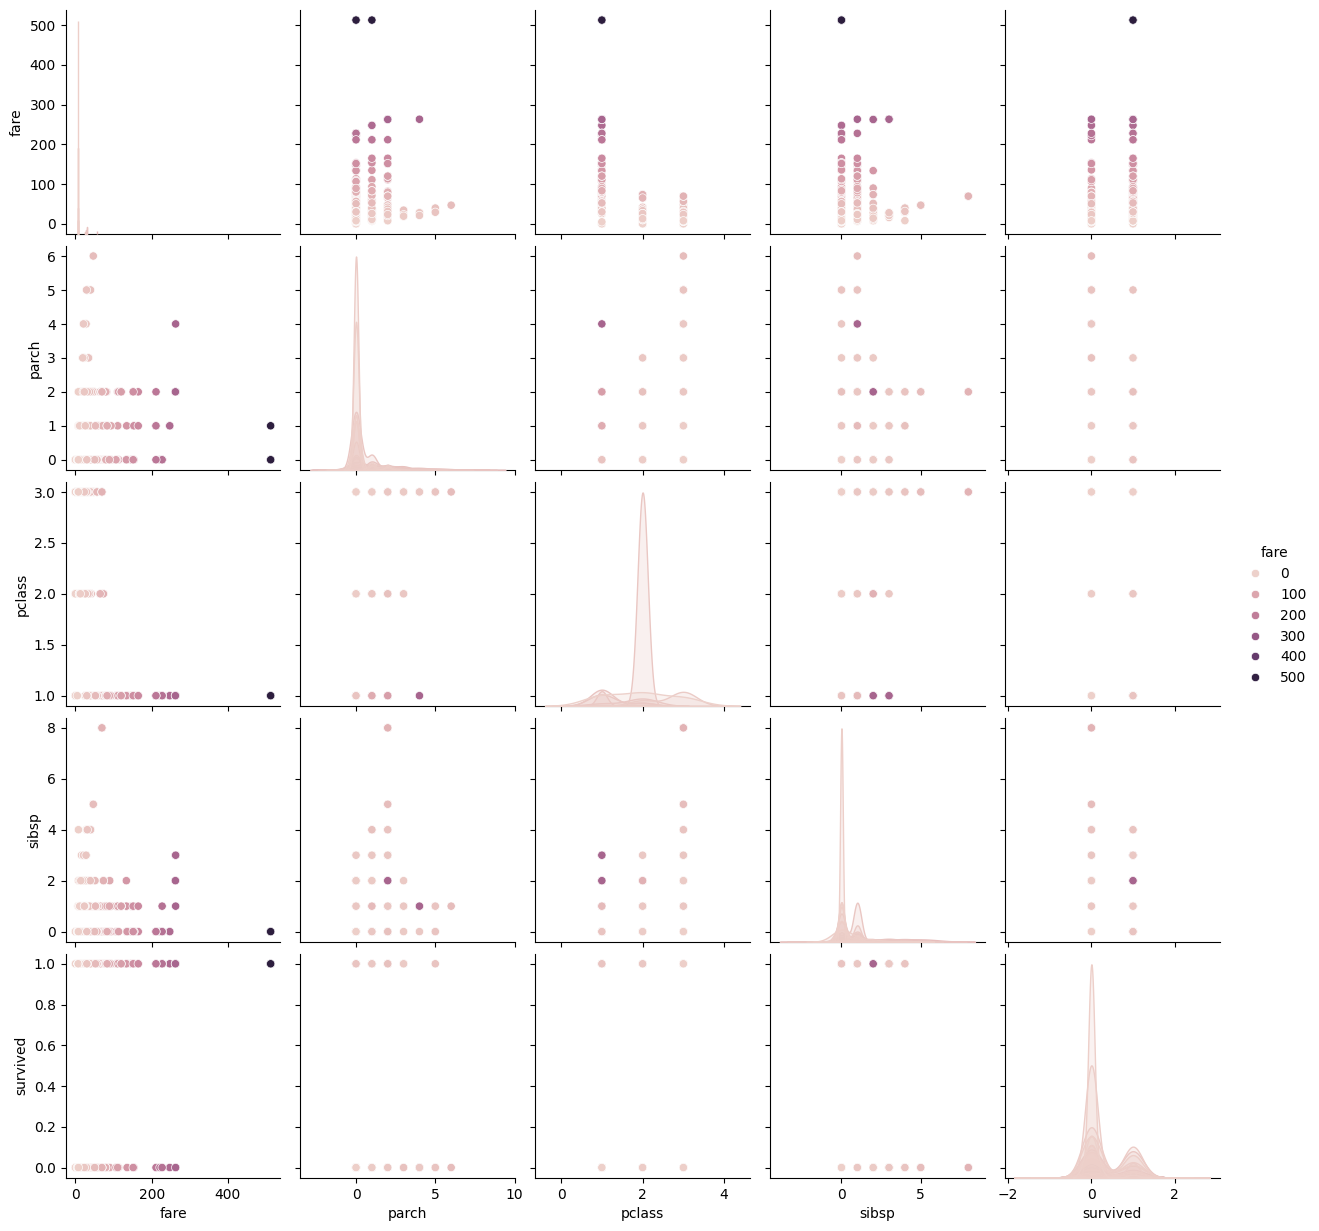

['parch', 'pclass', 'sibsp', 'survived']

In [18]:
plot_features_num_regression(titanic_df, target_col = "fare", columns=[], umbral_corr=0.1, pvalue=0.05)

### get_features_cat_regression()

In [ ]:
def get_features_cat_regression(df, target_col, pvalue = 0.05, card = 20):
    """
    Identifies categorical columns in a DataFrame that have a statistically significant relationship with a specified numeric target column.
    The function automatically chooses the appropriate test: ANOVA for categorical columns with more than two categories, and Mann-Whitney U for binary categorical columns.

    Parameters
    ----------
    df: pd.DataFrame
        The DataFrame containing the data.
    target_col: str
        The numeric target column used to test the relationship with categorical columns. This must be a numeric continuous variable with high cardinality.
    pvalue: float, optional 
        The significance level (default is 0.05) for statistical tests. Columns with p-values less than this will be considered significant.
    card: int, optional 
        The maximum percentage of unique values a column can have to be considered categorical (default is 20).

    Returns
    -------
    significant_categorical_features: list
        A list of categorical columns that have a statistically significant relationship with the target column, based on the specified p-value.
    """
    
    # Validate if the input is a DataFrame
    if not isinstance(df, pd.DataFrame):
        print('The first argument must be a Pandas DataFrame.')
        return None

    # Validate the target column exists in the DataFrame
    if target_col not in df.columns:
        print(f"The target column '{target_col}' must be present in the DataFrame.")
        return None

    # Validate target_col and card are numeric
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f'The column "{target_col}" must be numeric.')
        return None
    
    # Validate the target column has high cardinality
    percentage_card = df[target_col].nunique() * 100
    if percentage_card <= card:
        print(f'The column "{target_col}" does not have sufficient cardinality. More than {card}% of unique values are required.')
        return None

    # Validate the pvalue parameter
    if not isinstance(pvalue, (int, float)) or not (0 <= pvalue <= 1):
        print('"pvalue" must be a number between 0 and 1.')
        return None

    # Initialize a list to store categorical features that have a significant relationship with the target column
    significant_categorical_features = []
    
    # Initialize list with categorical features from the dataframe
    cat_columns = df.select_dtypes(include = ['object', 'category']).columns.tolist()
    
    # Validate if there are categorical columns
    if not cat_columns:
        print('No categorical columns found in dataframe.')
        return None

    # Iterate through the columns of the DataFrame
    for col in cat_columns:
        unique_values = df[col].unique()

        # If the column is binary, use Mann-Whitney U test
        if len(unique_values) == 2:
            groupA = df[df[col] == unique_values[0]][target_col]
            groupB = df[df[col] == unique_values[1]][target_col]

            # Perform the Mann-Whitney U test
            p_val = mannwhitneyu(groupA, groupB).pvalue

        else:
            # For columns with more than 2 unique values, use ANOVA (F-test)
            target_by_groups = [df[df[col] == group][target_col] for group in unique_values]

            # Perform the ANOVA test
            p_val = f_oneway(*target_by_groups).pvalue

        # Check if the p-value is below the specified significance threshold
        if p_val <= pvalue:
            significant_categorical_features.append(col)

    # Return the list of significant categorical features
    return significant_categorical_features


### plot_features_cat_regression()

In [ ]:
def plot_features_cat_regression(df, target_col = '', columns = [], pvalue = 0.05, with_individual_plot = False, card = 20):
    """
    Generates grouped histograms for categorical columns based on their relationship with a specified numeric target column.
    If specific categorical columns are not specified, the function will filter the categorical columns in the DataFrame 
    based on a significance test with the target column.
    
    Parameters
    ----------
    df: pd.DataFrame
        DataFrame containing the data.
    target_col: str
        The target column to plot histograms for, should be numeric.
    columns: list of str
        List of categorical columns to consider for histograms. If empty, will use all categorical columns.
    pvalue (float, optional, Default=0.05): 
        Significance level (between 0 and 1) for the statistical test.
    with_individual_plot (bool, optional, Default=False): 
        If True, generates individual histograms for each category.
    card: int 
        Cardinality threshold for determining if a column is considered categorical.
    
    Returns
    -------
    list: valid_columns
        List of columns that met the significance level.
    """
    
    # Carry out input data checks
    # 1. Check df is a dataframe
    if not isinstance(df, pd.DataFrame):
       raise TypeError('First argument must be a Pandas DataFrame.')

    # 2. Check target_col is in DataFrame
    if target_col not in df.columns:
        raise ValueError(f'The target column "{target_col}" is not present in the DataFrame.')
    
    # 3. Check target_col is numeric and continuous (high cardinality)
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        raise ValueError(f'The target column "{target_col}" must be numeric.')
    
    percentage_card = df[target_col].nunique() * 100
    if percentage_card <= card:
        print(f'The column "{target_col}" does not have sufficient cardinality. More than {card}% of unique values are required.')
        return None

    # 4. Check pvalue is float between 0 and 1
    if not isinstance(pvalue, (int, float)) or not (0 <= pvalue <= 1):
        raise ValueError("'pvalue' must be a number between 0 and 1.")

    
    # If no categorical columns are specified, get columns using function 'get_features_cat_regression()' using specified 'pvalue'
    if not columns:
        columns = get_features_cat_regression(df = df, target_col = target_col, pvalue = pvalue, card = card)
    
    # Get list of columns and remove target if present to plot histograms
    valid_columns = []
    for col in columns:
        if col == target_col:
            continue
        
        # Check if the column in valid_columns is categorical
        if len(df[col].unique()) <= card:
            # Perform the significance tests for the column
            if df[col].nunique() == 2:
                # Perform Mann-Whitney U test if only 2 groups present
                groupA = df[df[col] == df[col].unique()[0]][target_col]
                groupB = df[df[col] == df[col].unique()[1]][target_col]
                p_val = mannwhitneyu(groupA, groupB).pvalue
            else:
                # Perform ANOVA test if multiple groups in categorical column
                groups = df[col].unique()
                target_by_groups = [df[df[col] == group][target_col] for group in groups]
                p_val = f_oneway(*target_by_groups).pvalue
            
            # Check p-value against significance level
            if p_val <= pvalue:
                valid_columns.append(col)
            else:
                print(f"'{col}' did not meet the p-value significance level of {pvalue}.")
        else:
            print(f"'{col}' is not considered categorical based on your specified cardinality.")
    
    if not valid_columns:
        # Add a print line if no columns are provided and 'get_features_cat_regression' returns no columns based on specified 'pvalue'
        print(f'There are no categorical features with significant differences between the means\nof the groupings in relation to the specified target variable')
        return None
    
    # Plot histograms for valid categorical columns
    if not with_individual_plot:
        # Calculate number of columns per row
        num_cols = min(len(valid_columns), 4) 
        # Calculate number of rows
        num_rows = (len(valid_columns) + num_cols - 1) // num_cols 

        # Adjust figure size for number of rows
        plt.figure(figsize = (16, 5 * num_rows))  

        # All histograms on 1 figure
        for i, col in enumerate(valid_columns):
            plt.subplot(num_rows, num_cols, i + 1) # Logic for number of rows and columns
            sns.histplot(data = df, x = target_col, hue = col, element = 'step') # element='step' made the overlapping of histograms easier to understand visually
            plt.title(f'{target_col} by {col}')
            plt.xlabel(target_col)
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()
    
    else:
        # Plot histograms individually
        for col in valid_columns:
            plt.figure(figsize = (12, 6))
            sns.histplot(data = df, x = target_col, hue = col, element = 'step')
            plt.title(f'Histogram of {target_col} grouped by {col}')
            plt.xlabel(target_col)
            plt.ylabel('Frequency')
            plt.show()
    
    # Return the valid categorical columns
    return valid_columns